# Feature extraction
Each image can be represented by different color spaces. In this project will be used the RGB, HSV and LAB color spaces to extract the features of each image. At the end will have the next features.

- RGB(Mean & STD) of each channel
- HSV(Mean & STD) of each channel
- LAB(Mean & STD) of each channel

 It give a total of 18 features.

In [31]:
%load_ext autoreload

%autoreload 3

%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Import packages

In [1]:
from matplotlib import pyplot as plt
import cv2
import pyprojroot
import numpy as np
import pandas as pd
from pathlib  import Path
%matplotlib inline
#Local packages
from src.visualization.imgshow import imgshow
from src.features.extract_features import extract_features

## Paths

In [3]:
root_path =  pyprojroot.here()
img_folder = (root_path / "data"/'processed'/"img").as_posix()+'/'
data_interim_folder = (root_path / "data"/'interim')
data_processed_folder = (root_path / "data"/'processed')

## Constants

In [4]:
#Feature names
columns = ['filename','b_bgr_mean','g_bgr_mean','r_bgr_mean','h_hsv_mean','s_hsv_mean',\
'v_hsv_mean','l_lab_mean','a_lab_mean','b_lab_mean','b_bgr_std','g_bgr_std','r_bgr_std',\
'h_hsv_std','s_hsv_std','v_hsv_std','l_lab_std','a_lab_std','b_lab_std'
]

- Inspect a single image

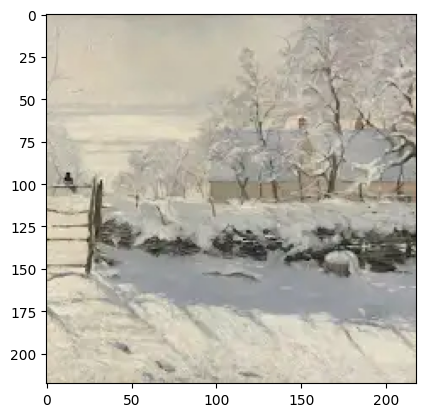

In [5]:
img = cv2.imread(img_folder+'0.jpg')
imgshow(img)

In [6]:
feature =extract_features(img)
label ='image'
attr = [label] + feature 
print(dict(zip(columns,attr)))

{'filename': 'image', 'b_bgr_mean': 162.80571921555423, 'g_bgr_mean': 175.30870717953033, 'r_bgr_mean': 179.59717195522262, 'h_hsv_mean': 29.922817944617456, 's_hsv_mean': 25.31398872148809, 'v_hsv_mean': 180.2263487921892, 'l_lab_mean': 182.1007280531942, 'a_lab_mean': 127.33862890329097, 'b_lab_mean': 134.94030384647758, 'b_bgr_std': 31.04061269547161, 'g_bgr_std': 33.87431031060191, 'r_bgr_std': 35.46013985885608, 'h_hsv_std': 23.673059512005448, 's_hsv_std': 11.842239238087338, 'v_hsv_std': 34.97760179043774, 'l_lab_std': 33.229758258397254, 'a_lab_std': 1.1972516174437853, 'b_lab_std': 3.9308036216043254}


## Extract features of all images

In [ ]:
import time

t1 = time.perf_counter()

image_paths = Path(img_folder).glob('*.jpg')
atributes_list = []
for path in list(image_paths):
    path_x = img_folder+path.name
    img = cv2.imread(path_x)
    features = extract_features(img)
    attributes = [path.name]+ features
    atributes_list.append(attributes)

t2 = time.perf_counter()
print(f'Finished in {t2-t1} seconds')


## Merge Features with general dataset

In [20]:
import pandas as pd
df_features = pd.DataFrame(atributes_list,columns=columns)

In [23]:
df_features.head()

,filename,b_bgr_mean,g_bgr_mean,r_bgr_mean,h_hsv_mean,s_hsv_mean,v_hsv_mean,l_lab_mean,a_lab_mean,b_lab_mean,b_bgr_std,g_bgr_std,r_bgr_std,h_hsv_std,s_hsv_std,v_hsv_std,l_lab_std,a_lab_std,b_lab_std
0,2936.jpg,131.881534,93.424017,29.916042,103.393780,217.222161,138.803320,98.520747,126.090249,102.784888,37.822248,36.898339,45.734917,19.683627,49.435556,32.906754,32.637751,17.765795,18.998403
1,10356.jpg,65.752567,93.429152,108.561169,27.130103,105.862238,111.318639,101.503451,130.187442,146.235670,41.372866,50.714714,56.126373,17.766126,47.946678,54.994613,52.942038,10.038349,9.736178
2,7655.jpg,74.711220,105.099318,139.372485,20.842374,101.887004,139.683823,120.625957,137.489332,150.600602,23.043877,33.592780,56.548727,9.881929,52.370741,56.181306,37.231280,15.548931,12.878623
3,15849.jpg,41.967869,44.120360,39.470688,68.533436,79.039054,48.895295,42.990973,125.795472,128.879913,36.374073,37.269331,39.463598,29.759100,40.859004,40.823119,41.407015,3.950034,6.880363
4,14497.jpg,56.423428,77.232283,93.434896,15.559275,106.463745,93.446196,81.492530,131.856346,141.928057,55.141370,73.826494,79.198369,19.518316,36.499210,79.204950,76.356248,3.770236,12.149282


In [24]:
df_pictures = pd.read_csv(data_interim_folder/'pictures.csv')

In [26]:
df_merge = df_features.merge(df_pictures,how='left',on='filename')

In [28]:
len(df_merge)

16311

In [90]:
df_merge.head()

,b,g,r,h,s,v,lab_l,lab_a,lab_b,filename,image,page,color,index
0,131.881534,93.424017,29.916042,103.393780,217.222161,138.803320,98.520747,126.090249,102.784888,2936.jpg,https://lh3.googleusercontent.com/ci/AC_FhM_Ub...,https://artsandculture.google.com/asset/the-lo...,BLUE,2936
1,65.752567,93.429152,108.561169,27.130103,105.862238,111.318639,101.503451,130.187442,146.235670,10356.jpg,https://lh3.googleusercontent.com/ci/AC_FhM_F2...,https://artsandculture.google.com/asset/a-spir...,BROWN,10356
2,74.711220,105.099318,139.372485,20.842374,101.887004,139.683823,120.625957,137.489332,150.600602,7655.jpg,https://lh3.googleusercontent.com/ci/AC_FhM-gX...,https://artsandculture.google.com/asset/edmund...,ORANGE,7655
3,41.967869,44.120360,39.470688,68.533436,79.039054,48.895295,42.990973,125.795472,128.879913,15849.jpg,https://lh3.googleusercontent.com/ci/AC_FhM_K4...,https://artsandculture.google.com/asset/portra...,BLACK,15849
4,56.423428,77.232283,93.434896,15.559275,106.463745,93.446196,81.492530,131.856346,141.928057,14497.jpg,https://lh3.googleusercontent.com/ci/AC_FhM-kg...,https://artsandculture.google.com/asset/a-woma...,BLACK,14497


# Export Features + Image Information 

In [30]:
df_merge.to_csv(data_processed_folder/'pictures.csv',index=False)